**Conclusions**: Full-AR process doesn't improve HUG alone.

In [1]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [2]:
folder = "experiment17/"
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")

THETA_ESS_HUG_AR = load(folder + "THETA_ESS_HUG_AR.npy")
U_ESS_HUG_AR     = load(folder + "U_ESS_HUG_AR.npy")
ESS_HUG_AR       = load(folder + "ESS_HUG_AR.npy")
A_HUG_AR         = load(folder + "A_HUG_AR.npy")
EJSD_HUG_AR      = load(folder + "EJSD_HUG_AR.npy")

RHOS    = load(folder + "RHOS.npy")
EPSILONS = load(folder + "EPSILONS.npy")

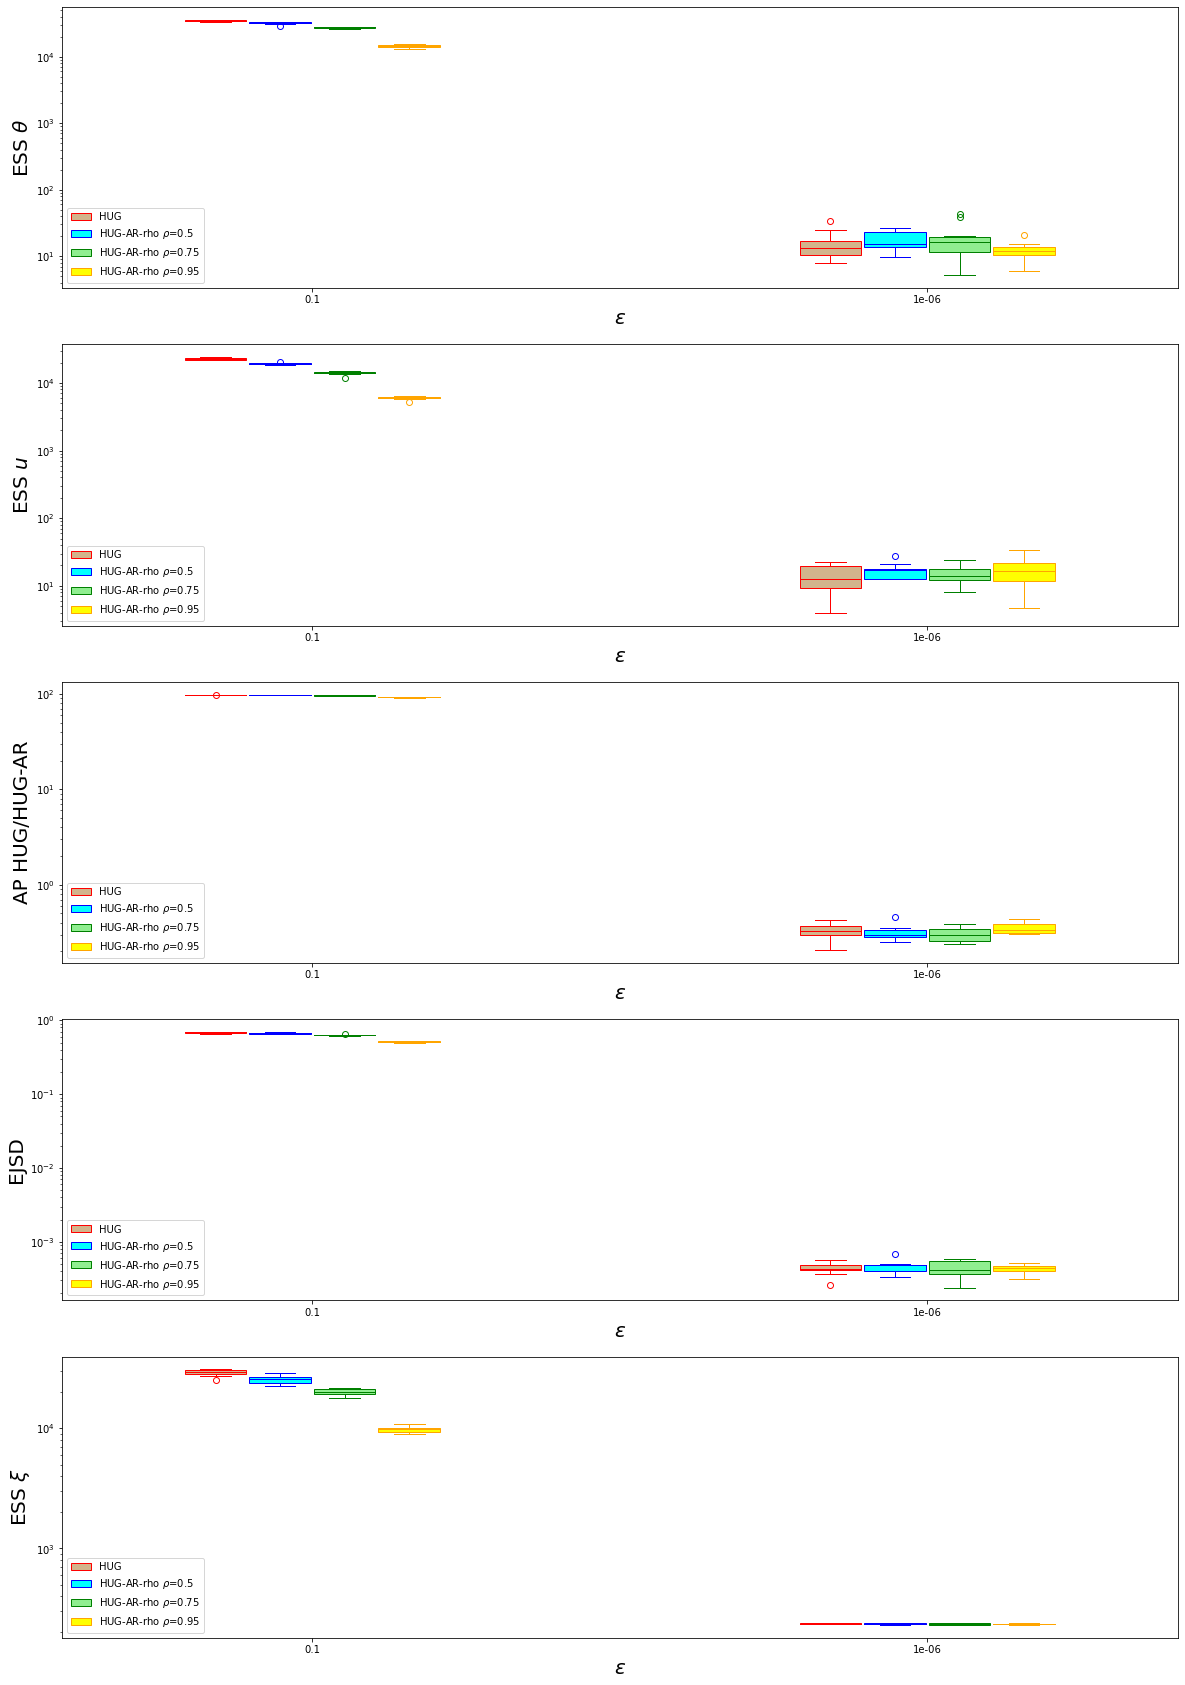

In [3]:
columns = EPSILONS
width = 0.21
n_alphas = len(RHOS)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']
labels = ['HUG'] + ['HUG-AR-rho $\\rho$={}'.format(rho) for rho in RHOS]

fig, ax = plt.subplots(nrows=5, figsize=(20, 30))
# Univariate ESS for \theta chain
bp1 = box_plot(ax[0], THETA_ESS_HUG.T.tolist(), 'red', 'tan', positions[0])
bps = []
for i in range(n_alphas):
    bps.append(box_plot(ax[0], THETA_ESS_HUG_AR[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
ax[0].legend(
    handles, 
    labels, 
    loc='lower left')
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(columns)
ax[0].set_xlabel("$\\epsilon$", fontsize=20)
ax[0].set_ylabel("ESS $\\theta$", fontsize=20)
ax[0].semilogy()

# Univariate ESS for u chain
bp1 = box_plot(ax[1], U_ESS_HUG.T.tolist(), 'red', 'tan', positions[0])
bps = []
for i in range(n_alphas):
    bps.append(box_plot(ax[1], U_ESS_HUG_AR[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
ax[1].legend(
    handles, 
    labels, 
    loc='lower left')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(columns)
ax[1].set_xlabel("$\\epsilon$", fontsize=20)
ax[1].set_ylabel("ESS $u$", fontsize=20)
ax[1].semilogy()

# ACCEPTANCE PROBABILITY 
bp1_a = box_plot(ax[2], A_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_a = []
for i in range(n_alphas):
    bps_a.append(box_plot(ax[2], A_HUG_AR[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_a["boxes"][0]] + [bp["boxes"][0] for bp in bps_a]
ax[2].legend(
    handles, 
    labels, 
    loc='lower left')
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(columns)
ax[2].set_xlabel("$\\epsilon$", fontsize=20)
ax[2].set_ylabel("AP HUG/HUG-AR", fontsize=20)
ax[2].semilogy()

#EJSD
bp1_e = box_plot(ax[3], EJSD_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_e = []
for i in range(n_alphas):
    bps_e.append(box_plot(ax[3], EJSD_HUG_AR[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_e["boxes"][0]] + [bp["boxes"][0] for bp in bps_e]
ax[3].legend(
    handles, 
    labels, 
    loc='lower left')
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(columns)
ax[3].set_xlabel("$\\epsilon$", fontsize=20)
ax[3].set_ylabel("EJSD", fontsize=20)
ax[3].semilogy()

# Joint ESS for u chain
bp1_jess = box_plot(ax[4], ESS_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_jess = []
for i in range(n_alphas):
    bps_jess.append(box_plot(ax[4], ESS_HUG_AR[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_jess["boxes"][0]] + [bp["boxes"][0] for bp in bps_jess]
ax[4].legend(
    handles, 
    labels, 
    loc='lower left')
ax[4].set_xticks(ticks)
ax[4].set_xticklabels(columns)
ax[4].set_xlabel("$\\epsilon$", fontsize=20)
ax[4].set_ylabel("ESS $\\xi$", fontsize=20)
ax[4].semilogy()

plt.show()